# Загрузка датасета

In [94]:
import pandas as pd

df = pd.read_csv("Malicious-URLs.csv")
urls = df["url"].values
print(len(urls))

df

15000


,count,url,labels
0,0,br-icloud.com.br,phishing
1,1,mp3raid.com/music/krizz_kaliko.html,benign
2,2,bopsecrets.org/rexroth/cr/1.htm,benign
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...,...
14995,14995,fortdefianceind.com/,benign
14996,14996,bookrags.com/lens/go.php?u=Hannah_Webster_Foster,benign
14997,14997,burbankairport.com/parking/buses-trains.html,benign
14998,14998,http://otomoto.pl/oferta/subaru-outback-legacy...,benign


In [95]:
df.info

<bound method DataFrame.info of        count                                                url      labels
0          0                                   br-icloud.com.br   phishing 
1          1                mp3raid.com/music/krizz_kaliko.html      benign
2          2                    bopsecrets.org/rexroth/cr/1.htm      benign
3          3  http://www.garage-pirenne.be/index.php?option=...  defacement
4          4  http://adventure-nicaragua.net/index.php?optio...  defacement
...      ...                                                ...         ...
14995  14995                               fortdefianceind.com/      benign
14996  14996   bookrags.com/lens/go.php?u=Hannah_Webster_Foster      benign
14997  14997       burbankairport.com/parking/buses-trains.html      benign
14998  14998  http://otomoto.pl/oferta/subaru-outback-legacy...      benign
14999  14999                    sfmuseum.org/hist2/bbridge.html      benign

[15000 rows x 3 columns]>

In [96]:
df.describe()

,count
count,15000.000000
mean,7499.500000
std,4330.271354
min,0.000000
25%,3749.750000
50%,7499.500000
75%,11249.250000
max,14999.000000


In [97]:
df.head(10)

,count,url,labels
0,0,br-icloud.com.br,phishing
1,1,mp3raid.com/music/krizz_kaliko.html,benign
2,2,bopsecrets.org/rexroth/cr/1.htm,benign
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,8,http://www.pashminaonline.com/pure-pashminas,defacement
9,9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [98]:
df.isnull().sum()

count     0
url       0
labels    0
dtype: int64

In [99]:
import seaborn as sns

In [100]:
count = df.labels.value_counts()
count

labels
benign        10991
defacement     2729
phishing        911
malware         368
phishing          1
Name: count, dtype: int64

C:\Users\PYTHON\AppData\Local\Temp\ipykernel_16912\714250651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count, palette='bright')


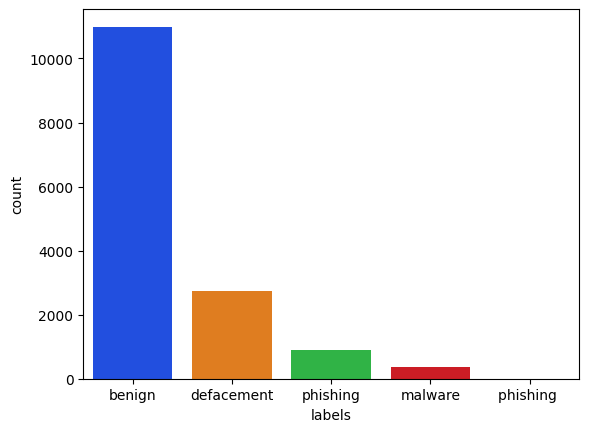

In [101]:
import matplotlib.pyplot as plt
sns.barplot(x=count.index, y=count, palette='bright')
plt.xlabel('labels')
plt.ylabel('count');

# Предобработка данных 

## удаляем дубликаты

In [102]:
df = df.drop_duplicates(subset="url")
df

,count,url,labels
0,0,br-icloud.com.br,phishing
1,1,mp3raid.com/music/krizz_kaliko.html,benign
2,2,bopsecrets.org/rexroth/cr/1.htm,benign
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...,...
14995,14995,fortdefianceind.com/,benign
14996,14996,bookrags.com/lens/go.php?u=Hannah_Webster_Foster,benign
14997,14997,burbankairport.com/parking/buses-trains.html,benign
14998,14998,http://otomoto.pl/oferta/subaru-outback-legacy...,benign


## нормализуем URL

In [103]:
df["url"] = df["url"].str.lower()
df

C:\Users\PYTHON\AppData\Local\Temp\ipykernel_16912\4216137420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["url"] = df["url"].str.lower()


,count,url,labels
0,0,br-icloud.com.br,phishing
1,1,mp3raid.com/music/krizz_kaliko.html,benign
2,2,bopsecrets.org/rexroth/cr/1.htm,benign
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...,...
14995,14995,fortdefianceind.com/,benign
14996,14996,bookrags.com/lens/go.php?u=hannah_webster_foster,benign
14997,14997,burbankairport.com/parking/buses-trains.html,benign
14998,14998,http://otomoto.pl/oferta/subaru-outback-legacy...,benign


In [104]:
import tldextract
from urllib.parse import urlparse

def extract_features(url):
    features = {}

    features["length"] = len(url)
    features["num_special_chars"] = sum(1 for c in url if c in ['@', '//', '%']) # это лексические признаки
    
    ext = tldextract.extract(url)
    features["subdomain_count"] = len(ext.subdomain.split('.')) if ext.subdomain else 0
    features["has_ip"] = 1 if any(part.isdigit() for part in ext.domain.split('.')) else 0 # это разбор домена
    
    keywords = ['login', 'admin', 'exe', 'php', 'config']
    features["keyword_count"] = sum(1 for kw in keywords if kw in url) # это сематика
    
    return features

features = df["url"].apply(extract_features)
features_df = pd.DataFrame(features.tolist())

In [105]:
features_df

,length,num_special_chars,subdomain_count,has_ip,keyword_count
0,16,0,0,0,0
1,35,0,0,0,0
2,31,0,0,0,0
3,88,0,1,0,1
4,200,0,0,0,1
...,...,...,...,...,...
14928,20,0,0,0,0
14929,48,0,0,0,1
14930,44,0,0,0,0
14931,108,0,0,0,0


## токенизация и векторизация

In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Токенизация URL
tokenizer = Tokenizer(num_words=10000, char_level=False, lower=True)
tokenizer.fit_on_texts(df["url"])
sequences = tokenizer.texts_to_sequences(df["url"])

# Выравнивание длины последовательностей
max_len = 100
X_padded = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

# Объединение с извлечёнными признаками
import numpy as np
X_features = np.array(features_df)
X_final = np.concatenate([X_padded, X_features], axis=1)


In [107]:
print("Размер X_padded:", X_padded.shape)
print("Размер X_features:", X_features.shape)

Размер X_padded: (14933, 100)
Размер X_features: (14933, 5)


In [108]:
X_features

array([[ 16,   0,   0,   0,   0],
       [ 35,   0,   0,   0,   0],
       [ 31,   0,   0,   0,   0],
       ...,
       [ 44,   0,   0,   0,   0],
       [108,   0,   0,   0,   0],
       [ 31,   0,   0,   0,   0]], dtype=int64)

In [109]:
 X_padded

array([[  59, 3860,    1, ...,    0,    0,    0],
       [1218,    1,   81, ...,    0,    0,    0],
       [9292,    8, 9293, ...,    0,    0,    0],
       ...,
       [   1, 8500, 6809, ...,    0,    0,    0],
       [   2,  845,  120, ...,    0,    0,    0],
       [   8,    3,    0, ...,    0,    0,    0]])

In [117]:
X_final

array([[  59, 3860,    1, ...,    0,    0,    0],
       [1218,    1,   81, ...,    0,    0,    0],
       [9292,    8, 9293, ...,    0,    0,    0],
       ...,
       [   1, 8500, 6809, ...,    0,    0,    0],
       [   2,  845,  120, ...,    0,    0,    0],
       [   8,    3,    0, ...,    0,    0,    0]], dtype=int64)

# Построение модели

## гибридная модель (LSTM + Dense)

In [110]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate

#вход для текстовых данных
text_input = Input(shape=(max_len,), name="text_input")
embedding = Embedding(input_dim=10000, output_dim=128)(text_input)
lstm = LSTM(64)(embedding)

#вход для признаков
features_input = Input(shape=(X_features.shape[1],), name="features_input")

#объединение слоёв
merged = Concatenate()([lstm, features_input])
dense1 = Dense(64, activation="relu")(merged)
output = Dense(1, activation="sigmoid")(dense1)

model = Model(inputs=[text_input, features_input], outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, 100)]                0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 100, 128)             1280000   ['text_input[0][0]']          
                                                                                                  
 lstm_4 (LSTM)               (None, 64)                   49408     ['embedding_4[0][0]']         
                                                                                                  
 features_input (InputLayer  [(None, 5)]                  0         []                            
 )                                                                                          

In [111]:
df["labels"] = df["labels"].map({'defacement': 0, 'phishing': 1, 'benign': 2, 'malware': 3})
df

C:\Users\PYTHON\AppData\Local\Temp\ipykernel_16912\4040089416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["labels"] = df["labels"].map({'defacement': 0, 'phishing': 1, 'benign': 2, 'malware': 3})


,count,url,labels
0,0,br-icloud.com.br,NaN
1,1,mp3raid.com/music/krizz_kaliko.html,2.0
2,2,bopsecrets.org/rexroth/cr/1.htm,2.0
3,3,http://www.garage-pirenne.be/index.php?option=...,0.0
4,4,http://adventure-nicaragua.net/index.php?optio...,0.0
...,...,...,...
14995,14995,fortdefianceind.com/,2.0
14996,14996,bookrags.com/lens/go.php?u=hannah_webster_foster,2.0
14997,14997,burbankairport.com/parking/buses-trains.html,2.0
14998,14998,http://otomoto.pl/oferta/subaru-outback-legacy...,2.0


In [114]:
df.loc[0, 'labels'] = 1.0
df

,count,url,labels
0,0,br-icloud.com.br,1.0
1,1,mp3raid.com/music/krizz_kaliko.html,2.0
2,2,bopsecrets.org/rexroth/cr/1.htm,2.0
3,3,http://www.garage-pirenne.be/index.php?option=...,0.0
4,4,http://adventure-nicaragua.net/index.php?optio...,0.0
...,...,...,...
14995,14995,fortdefianceind.com/,2.0
14996,14996,bookrags.com/lens/go.php?u=hannah_webster_foster,2.0
14997,14997,burbankairport.com/parking/buses-trains.html,2.0
14998,14998,http://otomoto.pl/oferta/subaru-outback-legacy...,2.0


In [112]:
df.labels.value_counts()

labels
2.0    10991
0.0     2727
1.0      911
3.0      303
Name: count, dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14933 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   14933 non-null  int64  
 1   url     14933 non-null  object 
 2   labels  14932 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 466.7+ KB


In [118]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

#разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    df.labels,
    test_size=0.2,
    stratify=df.labels
)

#ранняя остановка
early_stop = EarlyStopping(monitor="val_loss", patience=3)

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

#оценка
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/20


ValueError: in user code:

    File "C:\Python\projects\PythonProject\URL\.venv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Python\projects\PythonProject\URL\.venv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python\projects\PythonProject\URL\.venv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Python\projects\PythonProject\URL\.venv\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Python\projects\PythonProject\URL\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Python\projects\PythonProject\URL\.venv\lib\site-packages\keras\src\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model_4" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 105) dtype=int64>]
